In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/advertisements/ad.data', header=None, on_bad_lines='skip')

C:\Users\zippen\AppData\Local\Temp\ipykernel_24112\1146911660.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/advertisements/ad.data', header=None, on_bad_lines='skip')


In [4]:
data.loc[:,3].value_counts()
data.shape

(3279, 1559)

In [5]:
data.rename(columns={0: 'height', 1: 'width', 2: 'ratio', 1558: 'label' }, inplace=True)
data = data.replace('[?]', np.nan, regex=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to label
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [7]:
missing_values = data.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

height    903
width     901
ratio     910
3          15
dtype: int64


In [8]:
null_columns = missing_values.index
data[null_columns]= data[null_columns].astype(np.float32)

In [9]:
data.label = data.label.replace(['ad.','nonad.'],[1,0])


C:\Users\zippen\AppData\Local\Temp\ipykernel_24112\3015715271.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.label = data.label.replace(['ad.','nonad.'],[1,0])


In [10]:
data.dropna(axis = 0, inplace=True)
label = data.label
data = data.drop(columns= 'label')
data.shape

(2359, 1558)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=24)

In [12]:
X_train.head()

,height,width,ratio,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
2651,26.0,122.0,4.6923,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430,43.0,46.0,1.0697,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1409,100.0,78.0,0.7800,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,50.0,107.0,2.1400,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train.value_counts()

label
0    1477
1     292
Name: count, dtype: int64

<Axes: >

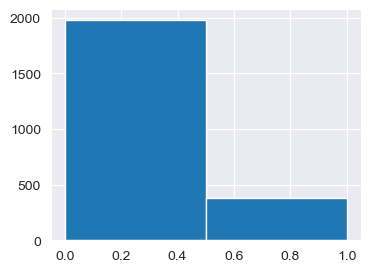

In [14]:
label.hist(bins=2,figsize=(4,3))

In [15]:
X_train_dis = X_train.copy(deep=True)
X_test_dis = X_test.copy(deep=True)
X_train_dis['label'] = 1
X_test_dis['label'] = 0
data_dis = pd.concat([X_train_dis,X_test_dis], axis=0)
data_dis.head()

,height,width,ratio,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,label
2651,26.0,122.0,4.6923,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1430,43.0,46.0,1.0697,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1409,100.0,78.0,0.7800,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
135,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42,50.0,107.0,2.1400,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


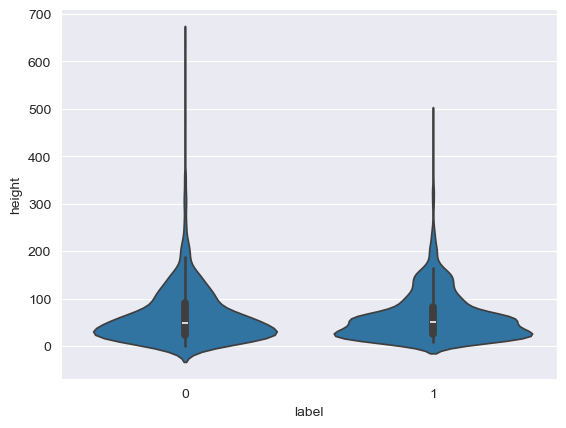

In [16]:
sns.violinplot(data= data_dis, x='label', y='height')
plt.show()

<Axes: xlabel='label', ylabel='width'>

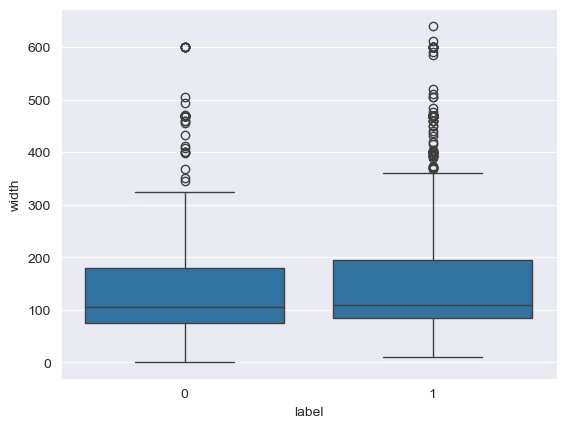

In [17]:
sns.boxplot(data=data_dis, x='label', y='width')

In [18]:
data_dis.head()

,height,width,ratio,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,label
2651,26.0,122.0,4.6923,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1430,43.0,46.0,1.0697,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1409,100.0,78.0,0.7800,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
135,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42,50.0,107.0,2.1400,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


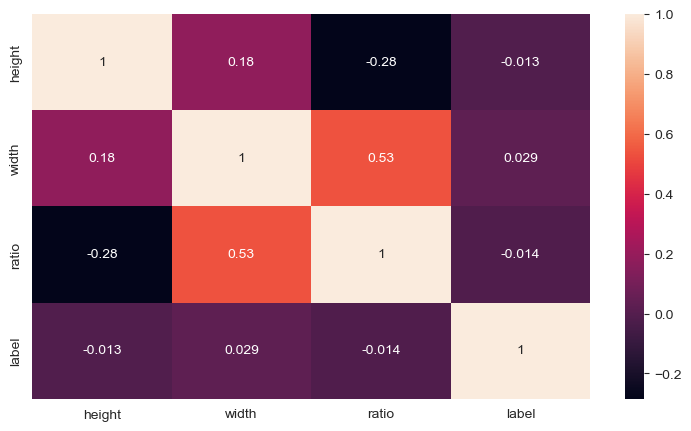

In [19]:
plt.subplots(figsize=(9,5))
corr = data_dis[['height','width','ratio','label']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [20]:
data_dis.sample(frac=0.5, random_state=24).reset_index(drop=True)
data_dis.head()

,height,width,ratio,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,label
2651,26.0,122.0,4.6923,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1430,43.0,46.0,1.0697,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1409,100.0,78.0,0.7800,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
135,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42,50.0,107.0,2.1400,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
data_dis = data_dis.dropna(axis=0, how='any')
data_dis.label.value_counts()

label
1    1769
0     590
Name: count, dtype: int64

In [22]:
label_dis = data_dis.label.copy()
data_dis = data_dis.drop(columns='label')
X_train_dis, X_test_dis, y_train_dis, y_test_dis = train_test_split(data_dis, label_dis, test_size=0.25, random_state=24)

In [23]:
X_train_dis.columns

Index(['height',  'width',  'ratio',        3,        4,        5,        6,
              7,        8,        9,
       ...
           1548,     1549,     1550,     1551,     1552,     1553,     1554,
           1555,     1556,     1557],
      dtype='object', length=1558)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train_dis.columns = X_train_dis.columns.astype('str')
X_test_dis.columns = X_test_dis.columns.astype('str')

clf = LogisticRegression()
clf.fit(X_train_dis, y_train_dis)
y_pred_dis = clf.predict(X_test_dis)
linear_auc_score = metrics.roc_auc_score(y_test_dis, y_pred_dis)
print(f'Logistic Regression AUC Score: {linear_auc_score}')

clf2 = DecisionTreeClassifier()
clf2.fit(X_train_dis, y_train_dis)
y_pred_dis2 = clf2.predict(X_test_dis)
tree_auc_score = metrics.roc_auc_score(y_test_dis, y_pred_dis2)
print(f'Decision Tree AUC Score: {tree_auc_score}')

F:\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC Score: 0.5096212121212121
Decision Tree AUC Score: 0.4906818181818181


In [25]:
from sklearn import model_selection
data_dis.columns = data_dis.columns.astype('str')
scores = model_selection.cross_val_score(clf2,data_dis, label_dis, cv=5,scoring='roc_auc')
print(f'score mean: {scores.mean()}, score std: {scores.std()}')

score mean: 0.47207727420322226, score std: 0.01240572714954061


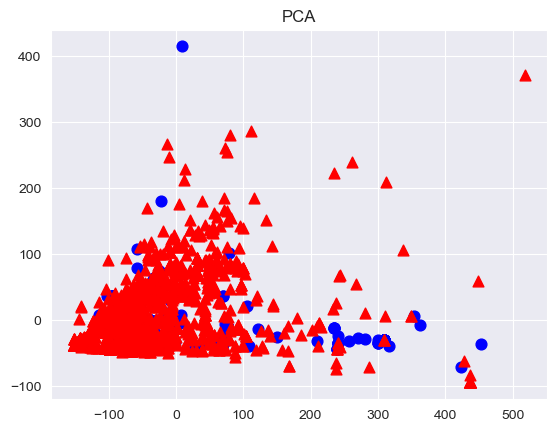

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train.columns = X_train.columns.astype('str')
X_train_pca = pca.fit_transform(X_train)
pos_mask = y_train == 1
neg_mask = y_train == 0
pos_X_train = X_train_pca[pos_mask]
neg_X_train = X_train_pca[neg_mask]

plt.scatter(pos_X_train[:,0], pos_X_train[:,1], c='blue', marker='o', s=60)
plt.scatter(neg_X_train[:,0], neg_X_train[:,1], c='red', marker='^', s=60)
plt.title('PCA')
plt.show()

In [27]:
label.value_counts()

label
0    1978
1     381
Name: count, dtype: int64

In [28]:
neg_label, pos_label = label.value_counts()[0], label.value_counts()[1]
scale_pos_weight = neg_label/pos_label
print(scale_pos_weight)

5.191601049868766


In [29]:
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'booster': 'gbtree',
    'nthread': -1,
    'eta': 0.1,
    'max_depth': 6,
    'gamma': 0,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': scale_pos_weight,
}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dtest, 'test')]
num_round = 100
bst = xgb.train(params, dtrain, num_boost_round=num_round, evals = watchlist)

[0]	train-auc:0.95826	test-auc:0.91261
[1]	train-auc:0.97275	test-auc:0.93053
[2]	train-auc:0.98296	test-auc:0.94540
[3]	train-auc:0.98289	test-auc:0.94542
[4]	train-auc:0.98318	test-auc:0.94585
[5]	train-auc:0.98616	test-auc:0.94490
[6]	train-auc:0.98636	test-auc:0.94529
[7]	train-auc:0.98623	test-auc:0.94515
[8]	train-auc:0.99053	test-auc:0.95466
[9]	train-auc:0.99460	test-auc:0.97634
[10]	train-auc:0.99456	test-auc:0.97629
[11]	train-auc:0.99463	test-auc:0.97673
[12]	train-auc:0.99605	test-auc:0.97775
[13]	train-auc:0.99587	test-auc:0.97767
[14]	train-auc:0.99634	test-auc:0.97434
[15]	train-auc:0.99633	test-auc:0.97410
[16]	train-auc:0.99670	test-auc:0.97145
[17]	train-auc:0.99706	test-auc:0.97554
[18]	train-auc:0.99707	test-auc:0.97541
[19]	train-auc:0.99733	test-auc:0.97523
[20]	train-auc:0.99733	test-auc:0.97487
[21]	train-auc:0.99743	test-auc:0.97572
[22]	train-auc:0.99771	test-auc:0.97928
[23]	train-auc:0.99787	test-auc:0.98099
[24]	train-auc:0.99798	test-auc:0.98167
[25]	train

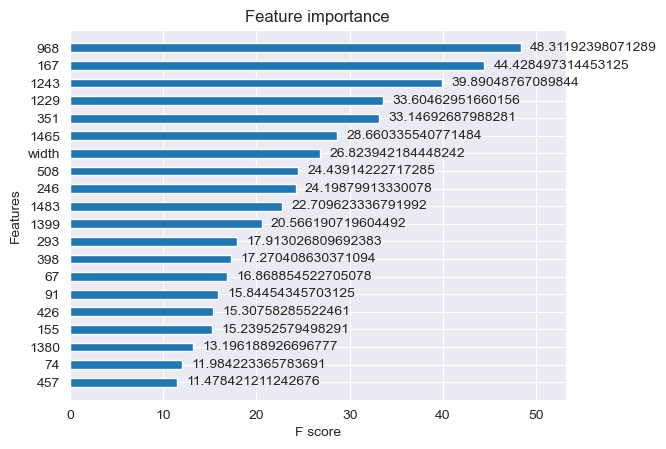

In [30]:
xgb.plot_importance(bst,max_num_features=20, importance_type='gain', height=0.5)
plt.show()

In [31]:
def xgb_optimization(
        num_boost_round,
        learning_rate,
        gamma,
        max_depth,
        min_child_weight,
        subsample,
        colsample_bytree,
        alpha
):
    num_boost_round = int(num_boost_round)
    params = {}
    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'auc'
    params['booster'] = 'gbtree'
    params['eta'] = float(learning_rate)
    params['max_depth'] = int(max_depth)
    params['min_child_weight'] = int(min_child_weight)
    params['subsample'] = float(subsample)
    params['colsample_bytree'] = float(colsample_bytree)
    params['alpha'] = float(alpha)
    params['gamma'] = float(gamma)
    
    cv_results = xgb.cv(params,dtrain,num_boost_round= num_boost_round, early_stopping_rounds=20, seed=24)
    return cv_results['test-auc-mean'].iloc[-1]

In [32]:
from bayes_opt import BayesianOptimization
pbounds = {
    'num_boost_round' : (100, 200),
    'learning_rate' : (0.05, 0.2),
    'gamma' : (0.1, 0.5),
    'max_depth' : (5, 10),
    'min_child_weight' : (1, 5),
    'subsample' : (0.5, 1),
    'colsample_bytree' : (0.5, 1),
    'alpha' : (0, 10),
    
}
xgb_opt = BayesianOptimization(xgb_optimization,pbounds)
xgb_opt.maximize(init_points=5, n_iter=30)


|   iter    |  target   |   alpha   | colsam... |   gamma   | learni... | max_depth | min_ch... | num_bo... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9766    | 9.223     | 0.6765    | 0.1111    | 0.09068   | 6.812     | 1.43      | 137.9     | 0.9201    |
| 2         | 0.9836    | 0.7731    | 0.6335    | 0.4191    | 0.1513    | 7.244     | 3.623     | 167.4     | 0.7878    |
| 3         | 0.9691    | 7.944     | 0.7734    | 0.3212    | 0.08883   | 6.12      | 3.141     | 170.4     | 0.7028    |
| 4         | 0.97      | 7.358     | 0.5006    | 0.103     | 0.1849    | 6.263     | 4.56      | 156.1     | 0.6295    |
| 5         | 0.97      | 8.156     | 0.9058    | 0.3941    | 0.1161    | 9.184     | 2.381     | 193.2     | 0.7314    |
| 6         | 0.9842    | 1.422     | 0.9151    | 0.3569    | 0.1061    | 7.813     | 2.768     | 189.0     | 0.7086    |
| 7         | 0.9835    